In [23]:
# Boilerplate startup
import numpy as np
import matplotlib
matplotlib.rc('font', size=16)
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

import hax

# If you get a ServerSelectionTimeoutError, there is a problem with your connection to the runs db
hax.init(experiment='XENON1T', 
         raw_data_access_mode = 'local',
         # Please provide the path to the raw data here
         raw_data_local_path = '/mnt/lena/xenon1t',
         # Please provide the right password here
         mongo_password='HAHAYOUDONTKNOWTHEPASSWORD',
)

In [30]:
hax.runs.datasets.sort_values(by='number').tail()

,name,number,raw_data_subfolder,reader:self_trigger,source:frequency,source:type,location,raw_data_found
17,160226_1132,23,,False,NaN,none,,True
6,160226_1207,24,,False,1000,LED,,True
20,160226_1218,25,,False,NaN,none,,True
3,160226_1351,26,,False,2000,LED,,True
2,160226_1354,27,,False,10000,LED,,True


In [20]:
help(hax.raw_data.raw_events)

Help on function raw_events in module hax.raw_data:

raw_events(dataset_number, event_numbers=None, config_override=None)
    Yields raw event(s) numbered event_numbers from dataset numbered dataset_number
    config_override is a dictionary with extra pax options



if you attempt to use any of the MongoDB plugins, pax will crash!


Event 0 has 254 pulses


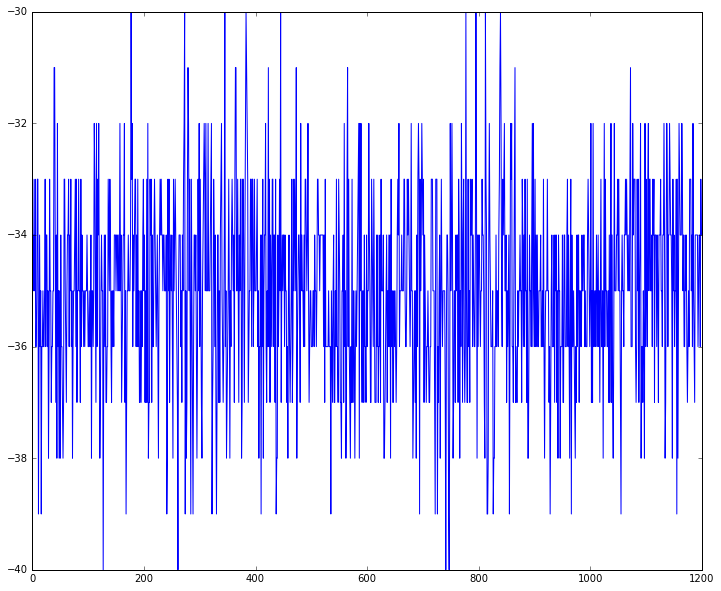

Event 1 has 254 pulses


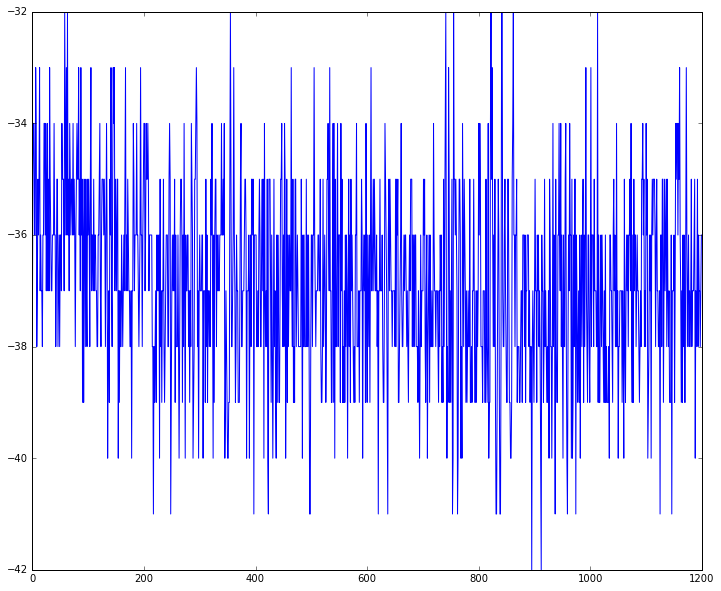

Event 2 has 254 pulses


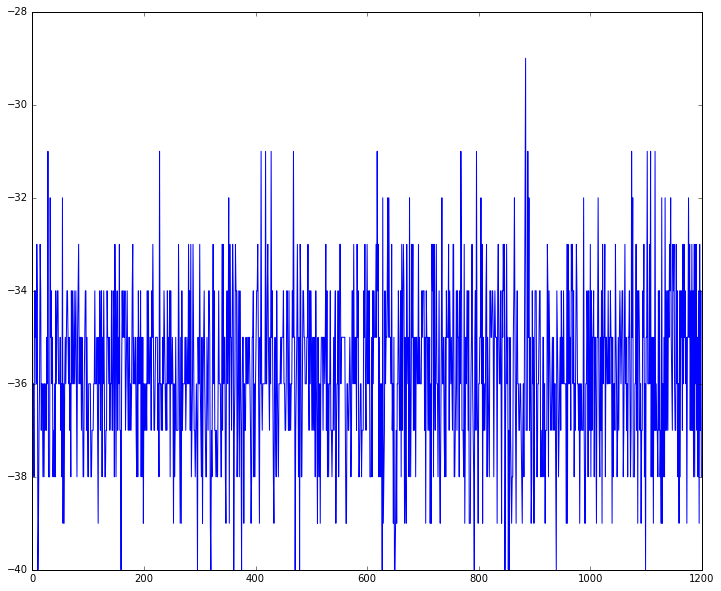

Event 3 has 254 pulses


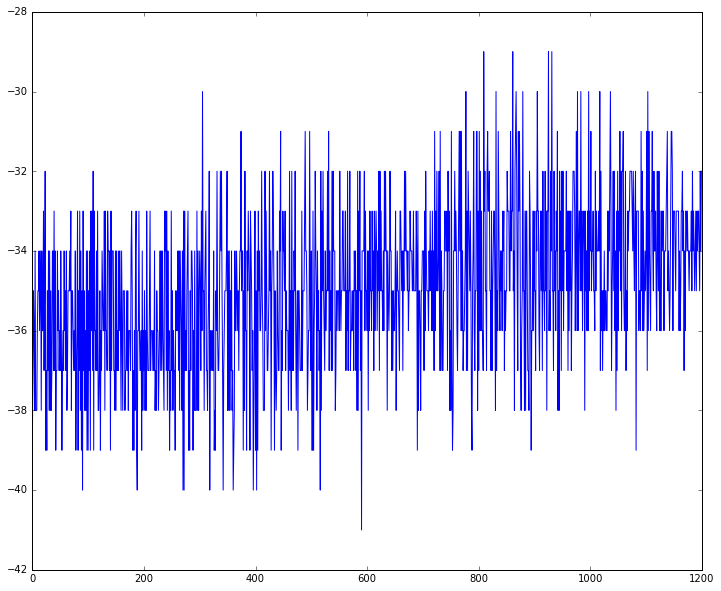

Event 4 has 254 pulses


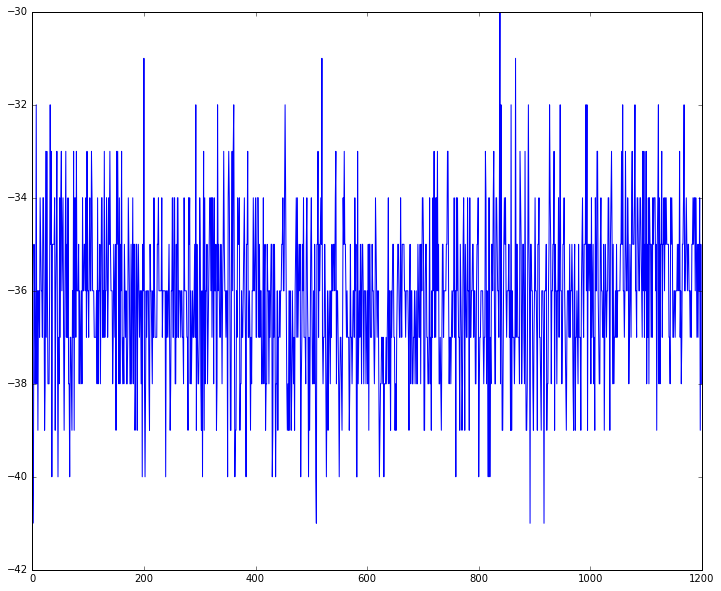

In [21]:
for event in hax.raw_data.raw_events(dataset_number=1):
    print("Event %d has %d pulses" % (event.event_number, len(event.pulses)))
    plt.plot(16000 - event.pulses[0].raw_data)
    plt.show()
    if event.event_number > 3:
        break